### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import csv of data

In [2]:
train_df = pd.read_csv("train.csv")

# Data understanding

In [3]:
train_df.shape

(1460, 81)

81 features!

In [4]:
train_df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

There are a good mix of int64, float64, and object data types.

In [5]:
# Preview the dataframe
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train_df.isna().any().sort_values(ascending=False)

FireplaceQu      True
Fence            True
BsmtFinType1     True
GarageQual       True
BsmtFinType2     True
                ...  
ExterQual       False
Exterior2nd     False
Exterior1st     False
RoofMatl        False
SalePrice       False
Length: 81, dtype: bool

We can see that there are some missing values so we need to explore those.

First, lets look at our target variable (house prices) to see if our data is normally distributed.

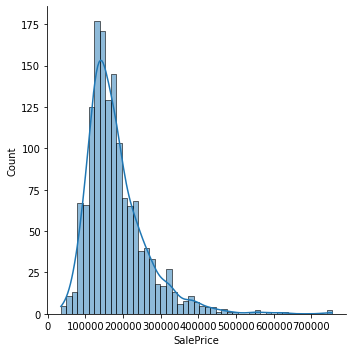

In [8]:
sns.displot(train_df['SalePrice'], kde=True);

Slightly skewed to the right so that may have to be addressed.

Now we will look into the the correlations of all of the variables

<AxesSubplot:>

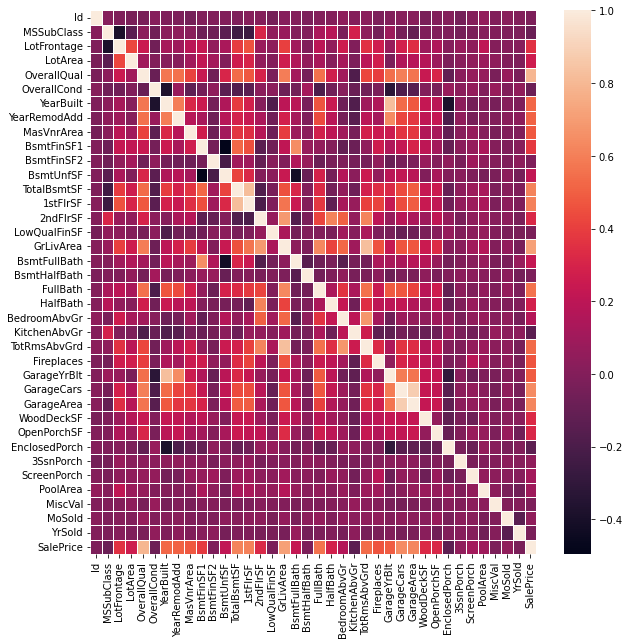

In [9]:
# correlation matrix
plt.figure(figsize = (10,10))
sns.heatmap(train_df.corr(), linewidth=1)

There are multiple variables that are strongly correlated with SalePrice.

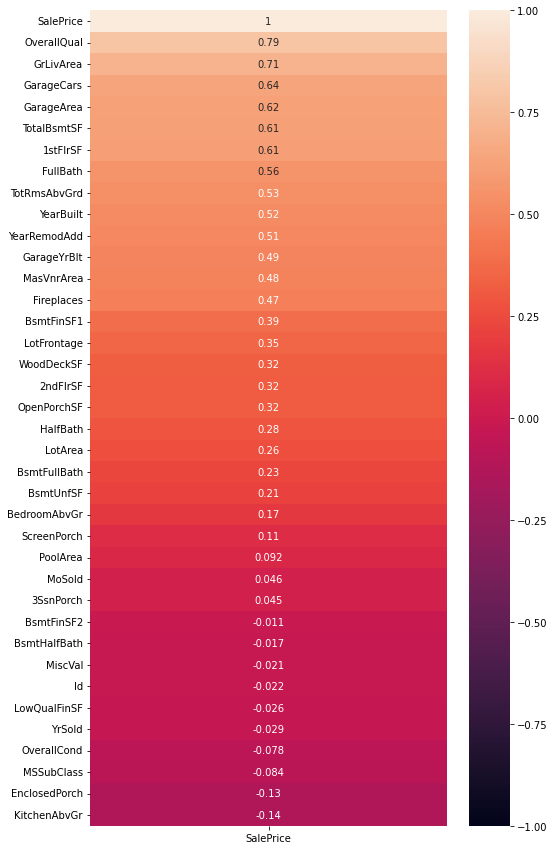

In [10]:
plt.figure(figsize=(8,15))
sns.heatmap(train_df.corr()[['SalePrice']].sort_values(by=['SalePrice'],ascending=False), vmin=-1, annot=True);

In [11]:
# features with highest correlation to SalePrice
high_corr = train_df.corr()
high_corr_feat = high_corr.index[abs(high_corr["SalePrice"]) >= 0.50]
print(high_corr_feat)

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')


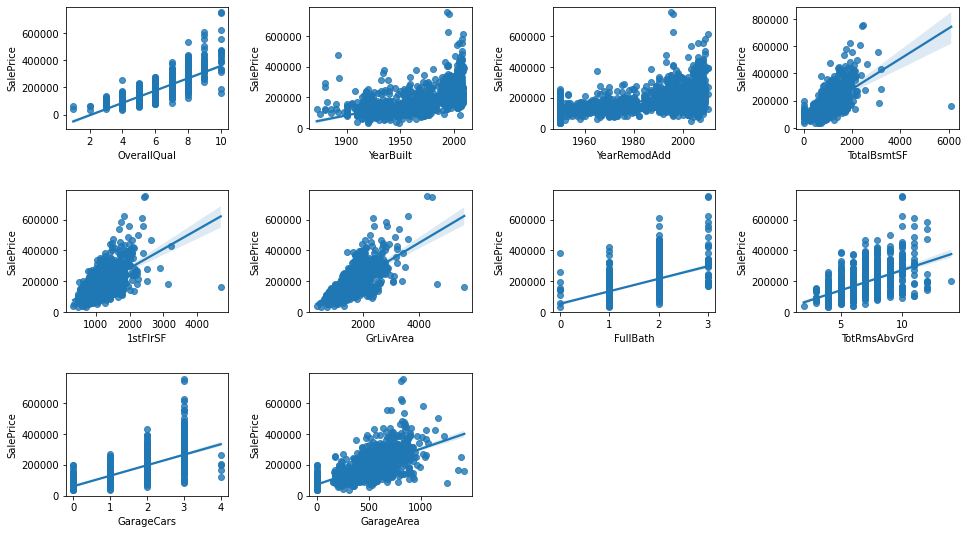

In [12]:
# plots of features with highly correlated data to SalePrice
plt.figure(figsize=(16,9))
for i in range(len(high_corr_feat)):
    if i <= 9:
        plt.subplot(3,4,i+1)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(data = train_df, x = high_corr_feat[i], y = 'SalePrice')

The top 10 highest values are "OverallQual",  "GrLivArea",  "GarageCars",  "GarageArea",  "TotalBsmtSF", "1stFlrSF",  "FullBath",  "TotRmsAbvGrd",  "YearBuilt", and  "YearRemodAdd"

Now that we have gained insight into our dataset and some of its distributions, we can move forward into pre-processing.

# Pre-processing

In [13]:
# drop Id column
train_df.drop(columns = 'Id', axis = 1, inplace = True)

### Check for missing values 

In [14]:
# check for nulls
nulls = train_df.isna().sum()[train_df.isna().sum() > 1]
nulls

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

We will drop the features with missing values over 250.

In [15]:
# drop features that contain at least 250 missing values
train_df.drop(columns=train_df.isna().sum()[train_df.isna().sum() > 250].index, axis=1, inplace=True)

In [16]:
nulls = train_df.isna().sum()[train_df.isna().sum() > 1]
nulls

MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [17]:
train_df.shape

(1460, 74)

We now have 74 features.

### Numericals

In [18]:
numericals = train_df.select_dtypes(include=['int64','float64'])
numericals

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0.0,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,13175,6,6,1978,1988,119.0,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,9042,7,9,1941,2006,0.0,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,9717,5,6,1950,1996,0.0,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


In [19]:
list(numericals.columns)

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [20]:
len(numericals.columns)

36

In [21]:
numericals.dtypes.value_counts()

int64      34
float64     2
dtype: int64

In [22]:
numericals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotArea        1460 non-null   int64  
 2   OverallQual    1460 non-null   int64  
 3   OverallCond    1460 non-null   int64  
 4   YearBuilt      1460 non-null   int64  
 5   YearRemodAdd   1460 non-null   int64  
 6   MasVnrArea     1452 non-null   float64
 7   BsmtFinSF1     1460 non-null   int64  
 8   BsmtFinSF2     1460 non-null   int64  
 9   BsmtUnfSF      1460 non-null   int64  
 10  TotalBsmtSF    1460 non-null   int64  
 11  1stFlrSF       1460 non-null   int64  
 12  2ndFlrSF       1460 non-null   int64  
 13  LowQualFinSF   1460 non-null   int64  
 14  GrLivArea      1460 non-null   int64  
 15  BsmtFullBath   1460 non-null   int64  
 16  BsmtHalfBath   1460 non-null   int64  
 17  FullBath       1460 non-null   int64  
 18  HalfBath

In [23]:
numericals.isna().sum()[numericals.isna().sum() > 1]

MasVnrArea      8
GarageYrBlt    81
dtype: int64

In [24]:
# fill missing numericals with 0
numericals.fillna(value = 0, inplace = True)

In [25]:
numericals.isna().any()

MSSubClass       False
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt      False
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SalePrice        False
dtype: bool

### Categoricals

In [26]:
categoricals = train_df.select_dtypes(include=['object'])
categoricals

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [27]:
list(categoricals.columns)

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [28]:
len(categoricals.columns)

38

In [29]:
categoricals.dtypes.value_counts()

object    38
dtype: int64

In [30]:
categoricals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1452 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

In [31]:
categoricals.isna().sum()[categoricals.isna().sum() > 1]

MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [32]:
# fill missing categoricals with 'None'
objects = []
for i in categoricals.columns:
  if categoricals[i].dtype == object:
    objects.append(i)
    categoricals.update(categoricals[objects].fillna('None'))

In [33]:
categoricals.isna().any()

MSZoning         False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinType2     False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
KitchenQual      False
Functional       False
GarageType       False
GarageFinish     False
GarageQual       False
GarageCond       False
PavedDrive       False
SaleType         False
SaleCondition    False
dtype: bool

### Convert categorical values to numerical values

In [34]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

train_df.MSZoning = le.fit_transform(train_df.MSZoning)
train_df.Street = le.fit_transform(train_df.Street)
train_df.LotShape = le.fit_transform(train_df.LotShape)
train_df.LandContour = le.fit_transform(train_df.LandContour)
train_df.Utilities = le.fit_transform(train_df.Utilities)
train_df.LotConfig = le.fit_transform(train_df.LotConfig)
train_df.LandSlope = le.fit_transform(train_df.LandSlope)
train_df.Neighborhood = le.fit_transform(train_df.Neighborhood)
train_df.Condition1 = le.fit_transform(train_df.Condition1)
train_df.Condition2 = le.fit_transform(train_df.Condition2)
train_df.BldgType = le.fit_transform(train_df.BldgType)
train_df.HouseStyle = le.fit_transform(train_df.HouseStyle)
train_df.RoofStyle = le.fit_transform(train_df.RoofStyle)
train_df.RoofMatl = le.fit_transform(train_df.RoofMatl)
train_df.Exterior1st = le.fit_transform(train_df.Exterior1st)
train_df.Exterior2nd = le.fit_transform(train_df.Exterior2nd)
train_df.MasVnrType = le.fit_transform(train_df.MasVnrType)
train_df.ExterQual = le.fit_transform(train_df.ExterQual)
train_df.ExterCond = le.fit_transform(train_df.ExterCond)
train_df.Foundation = le.fit_transform(train_df.Foundation)
train_df.BsmtQual = le.fit_transform(train_df.BsmtQual)
train_df.BsmtCond = le.fit_transform(train_df.BsmtCond)
train_df.BsmtExposure = le.fit_transform(train_df.BsmtExposure)
train_df.BsmtFinType1 = le.fit_transform(train_df.BsmtFinType1)
train_df.BsmtFinType2 = le.fit_transform(train_df.BsmtFinType2)
train_df.Heating = le.fit_transform(train_df.Heating)
train_df.HeatingQC = le.fit_transform(train_df.HeatingQC)
train_df.CentralAir = le.fit_transform(train_df.CentralAir)
train_df.Electrical = le.fit_transform(train_df.Electrical)
train_df.KitchenQual = le.fit_transform(train_df.KitchenQual)
train_df.Functional = le.fit_transform(train_df.Functional)
train_df.GarageType = le.fit_transform(train_df.GarageType)
train_df.GarageFinish = le.fit_transform(train_df.GarageFinish)
train_df.GarageQual = le.fit_transform(train_df.GarageQual)
train_df.GarageCond = le.fit_transform(train_df.GarageCond)
train_df.PavedDrive = le.fit_transform(train_df.PavedDrive)
train_df.SaleType = le.fit_transform(train_df.SaleType)
train_df.SaleCondition = le.fit_transform(train_df.SaleCondition)

train_df.dropna(axis=1,inplace = True)

train_df

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,1,3,3,0,4,0,5,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,11250,1,0,3,0,4,0,5,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,9550,1,0,3,0,0,0,6,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,14260,1,0,3,0,2,0,15,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,7917,1,3,3,0,4,0,8,...,0,0,0,0,0,8,2007,8,4,175000
1456,20,3,13175,1,3,3,0,4,0,14,...,0,0,0,0,0,2,2010,8,4,210000
1457,70,3,9042,1,3,3,0,4,0,6,...,0,0,0,0,2500,5,2010,8,4,266500
1458,20,3,9717,1,3,3,0,4,0,12,...,112,0,0,0,0,4,2010,8,4,142125


In [35]:
list(train_df.columns)

['MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',

In [36]:
len(train_df.columns)

74

In [37]:
train_df.dtypes.value_counts()

int64      72
float64     2
dtype: int64

In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   int64  
 4   LotShape       1460 non-null   int64  
 5   LandContour    1460 non-null   int64  
 6   Utilities      1460 non-null   int64  
 7   LotConfig      1460 non-null   int64  
 8   LandSlope      1460 non-null   int64  
 9   Neighborhood   1460 non-null   int64  
 10  Condition1     1460 non-null   int64  
 11  Condition2     1460 non-null   int64  
 12  BldgType       1460 non-null   int64  
 13  HouseStyle     1460 non-null   int64  
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

With all of our data cleaned of nulls and converted to numerical values, we can begin our experiments. 

# Experiment 1

We noticed during our visualizations that there are multiple variables that are strongly correlated with SalePrice. We will use those 10 features. 

As a reminder, the highest values are "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt", and "YearRemodAdd"

### Linear Regression 1

In [39]:
# sklearn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [40]:
# assign feature columns as a list
feature_cols = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']

In [41]:
# assign X to only include those feature columns
X = train_df[feature_cols]

# assign y to dependent response variable
y = train_df['SalePrice']

In [42]:
# assign data to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42) 

In [43]:
# instantiate
linreg1 = LinearRegression()

# fit data to the linear regression model
linreg1.fit(X_train, y_train)

LinearRegression()

In [44]:
# intercept
print(f'Intercept: {linreg1.intercept_}')

# coefficients of each feature
list_features = list(zip(feature_cols, linreg1.coef_))
print('Coefficients: ')
for list_features in list_features:
    print (list_features)

Intercept: -1236960.0471692458
Coefficients: 
('OverallQual', 19706.15592019373)
('YearBuilt', 289.1068751345646)
('YearRemodAdd', 304.45633171349755)
('TotalBsmtSF', 12.05782864126607)
('1stFlrSF', 15.303836411584001)
('GrLivArea', 46.415115146948494)
('FullBath', -6968.063288247695)
('TotRmsAbvGrd', 594.1937730064185)
('GarageCars', 14181.862961735185)
('GarageArea', 7.521263479668477)


### Evaluation of model

In [45]:
# get predictions
y_pred = linreg1.predict(X_test)

In [46]:
# evaluations
print('Coefficient of Determination:', linreg1.score(X_test, y_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Coefficient of Determination: 0.8011222436439066
Mean Absolute Error: 24355.86768216195
Mean Squared Error: 1387787630.8180628
Root Mean Squared Error: 37253.02176761052


Our coefficient of determination or accuracy score is only about 80 percent which isn't bad but I want to see if there is a way to increase that. 

# Experiment 2

For this experiment, I will perform further preprocessing to improve the linear regression model's performance. I wanted to try fixing the skewness of SalePrice and its features. 

### Address skewness

Skewness: 1.882876


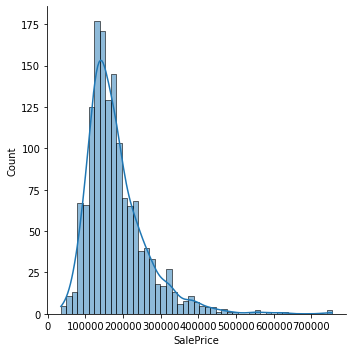

In [47]:
# skewness of SalePrice
sns.displot(train_df['SalePrice'], kde=True);
print("Skewness: %f" % train_df['SalePrice'].skew())

First, I will examine the target variable SalePrice and normalize it. Since it is skewed to the right, I will apply log(1+x) transformation to it to obtain normal distribution.

Skewness: 0.121347


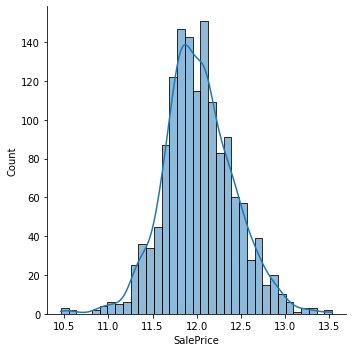

In [48]:
# apply log transformation
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

# check new distribution 
sns.displot(train_df['SalePrice'], kde=True)
print("Skewness: %f" % train_df['SalePrice'].skew())

Next, I will check to see if the features are skewed. If they have skewness >= 1, I will apply log transformation to normalize them.

In [49]:
# print out skewness of features
print('Skewness:')
print("OverallQual: %f" % train_df['OverallQual'].skew())
print("YearBuilt: %f" % train_df['YearBuilt'].skew())
print("YearRemodAdd: %f" % train_df['YearRemodAdd'].skew())
print("TotalBsmtSF: %f" % train_df['TotalBsmtSF'].skew())
print("1stFlrSF: %f" % train_df['1stFlrSF'].skew())
print("GrLivArea: %f" % train_df['GrLivArea'].skew())
print("FullBath: %f" % train_df['FullBath'].skew())
print("TotRmsAbvGrds: %f" % train_df['TotRmsAbvGrd'].skew())
print("GarageCars: %f" % train_df['GarageCars'].skew())
print("GarageArea: %f" % train_df['GarageArea'].skew())

Skewness:
OverallQual: 0.216944
YearBuilt: -0.613461
YearRemodAdd: -0.503562
TotalBsmtSF: 1.524255
1stFlrSF: 1.376757
GrLivArea: 1.366560
FullBath: 0.036562
TotRmsAbvGrds: 0.676341
GarageCars: -0.342549
GarageArea: 0.179981


In [50]:
# apply log transformation
train_df['TotalBsmtSF'] = np.log1p(train_df['TotalBsmtSF'])
train_df['1stFlrSF'] = np.log1p(train_df['1stFlrSF'])
train_df['GrLivArea'] = np.log1p(train_df['GrLivArea'])

# check distribution
print("TotalBsmtSF: %f" % train_df['TotalBsmtSF'].skew())
print("1stFlrSF: %f" % train_df['1stFlrSF'].skew())
print("GrLivArea: %f" % train_df['GrLivArea'].skew())

TotalBsmtSF: -5.154670
1stFlrSF: 0.080114
GrLivArea: -0.006140


Since log transformation did not really help for TotalBsmtSF, I am going to check if outliers may be the culprit.

Skewness: -5.154670


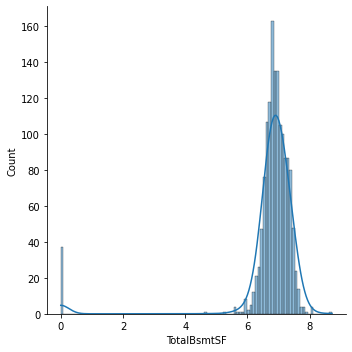

In [51]:
# skewness of TotalBsmtSF
sns.displot(train_df['TotalBsmtSF'], kde=True);
print("Skewness: %f" % train_df['TotalBsmtSF'].skew())

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

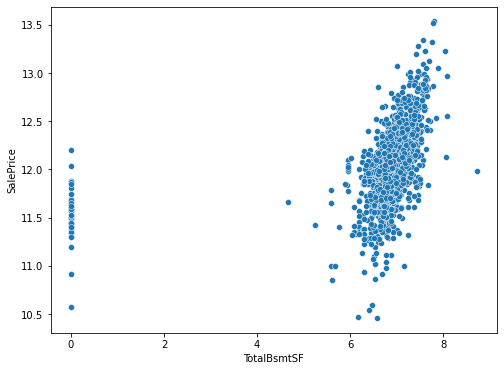

In [52]:
# scatterplot of TotalBsmtSF
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=train_df)

In [53]:
# drop outliers equaling 0
outliers = train_df[(train_df.TotalBsmtSF == 0)].index
train_df.drop(outliers, axis=0, inplace=True)

In [54]:
print("TotalBsmtSF: %f" % train_df['TotalBsmtSF'].skew())

TotalBsmtSF: -0.272720


In [55]:
train_df.shape

(1423, 74)

### Linear Regression 2

In [56]:
# assign feature columns as a list
feature_cols = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']

In [57]:
# assign X to only include those feature columns
X2 = train_df[feature_cols]

# assign y to dependent response variable
y2 = train_df['SalePrice']

In [58]:
# assign data to training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = .3, random_state=42)

In [59]:
# instantiate
linreg2 = LinearRegression()

# fit data to the linear regression model
linreg2.fit(X2_train, y2_train)

LinearRegression()

In [60]:
# intercept
print(f'Intercept: {linreg2.intercept_}')

# coefficients of each feature
list_features = list(zip(feature_cols, linreg2.coef_))
print('Coefficients: ')
for list_features in list_features:
    print (list_features)

Intercept: -1.3039501025999432
Coefficients: 
('OverallQual', 0.08565171847420609)
('YearBuilt', 0.001857182053334652)
('YearRemodAdd', 0.002420356381292442)
('TotalBsmtSF', 0.10621732561830535)
('1stFlrSF', 0.08777011797579876)
('GrLivArea', 0.39706287306713006)
('FullBath', -0.03799951218455025)
('TotRmsAbvGrd', 0.006031245945794564)
('GarageCars', 0.06161638220547187)
('GarageArea', 4.188682467169951e-05)


### Evaluation of model

In [61]:
# get predictions
y2_pred = linreg2.predict(X2_test)

In [62]:
# evaluations
print('Coefficient of Determination:', linreg2.score(X2_test, y2_test))
print('Mean Absolute Error:', mean_absolute_error(y2_test, y2_pred))
print('Mean Squared Error:', mean_squared_error(y2_test, y2_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y2_test, y2_pred)))

Coefficient of Determination: 0.8401847426026792
Mean Absolute Error: 0.11523831737681575
Mean Squared Error: 0.026256608021692003
Root Mean Squared Error: 0.16203890897464104


Our accuracy score increased a tiny bit by 0.04

# Experiment 3

I will now try random forest regression. We do not need to pre-process in this experiment as we will be using the data that we've pre-processed in experiments 1 and 2.

## Random Forest

In [63]:
from sklearn.ensemble import  RandomForestRegressor

In [64]:
# assign X to only include those feature columns
X3 = train_df[feature_cols]

# assign y to dependent response variable
y3 = train_df['SalePrice']

In [65]:
# assign data to training and testing sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42) 

In [66]:
# create an object of the RandomForestRegressor
ranfor = RandomForestRegressor(n_estimators=100)

# fit the model with the training data
ranfor.fit(X3_train, y3_train)

RandomForestRegressor()

### Evaluation of Random Forest

In [67]:
# predict the target
y3_pred = ranfor.predict(X3_test)

In [68]:
# evaluations
print('Coefficient of Determination:', ranfor.score(X3_test, y3_test))
print('Mean Absolute Error:', mean_absolute_error(y3_test, y3_pred))
print('Mean Squared Error:', mean_squared_error(y3_test, y3_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y3_test, y3_pred)))

Coefficient of Determination: 0.8354230883442374
Mean Absolute Error: 0.11432475269261762
Mean Squared Error: 0.027038916866509614
Root Mean Squared Error: 0.1644351448641975
